In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


# Load the dataset
file_path = 'Commody X Consumption Data.xlsx'
df = pd.read_excel(file_path)

# Display the first few rows of the dataset
df.head()


,Unnamed: 0,Product X Consumption Rate,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42
0,Location,1982,1983,1984,1985,1986,1987,1988,1989,1990,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,6,7,5,2,4,6,6,6,6,6
3,Albania,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,2,2,2,2,1,2,3,3,3,3
4,Algeria,10,15,7,8,6,10,14,6,6,...,9,3,3,5,6,5,4,4,4,4


In [2]:

df.columns = df.iloc[0]
df = df.drop([0, 1]).reset_index(drop=True)
df.rename(columns={'Location': 'Country'}, inplace=True)
df.replace('no data', pd.NA, inplace=True)
df.iloc[:, 1:] = df.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')


# Display the cleaned dataset
df.head()


,Country,1982,1983,1984,1985,1986,1987,1988,1989,1990,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,7.0,5.0,2.0,4.0,6.0,6.0,6.0,6.0,6.0
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,2.0,2.0,2.0,1.0,2.0,3.0,3.0,3.0,3.0
2,Algeria,10.0,15.0,7.0,8.0,6.0,10.0,14.0,6.0,6.0,...,9.0,3.0,3.0,5.0,6.0,5.0,4.0,4.0,4.0,4.0
3,Angola,47.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,10.0,9.0,7.0,10.0,32.0,27.0,18.0,14.0,11.0,9.0
4,Antigua and Barbuda,19.0,12.0,4.0,2.0,4.0,1.0,1.0,4.0,7.0,...,3.0,1.0,1.0,1.0,0.0,2.0,2.0,3.0,3.0,3.0


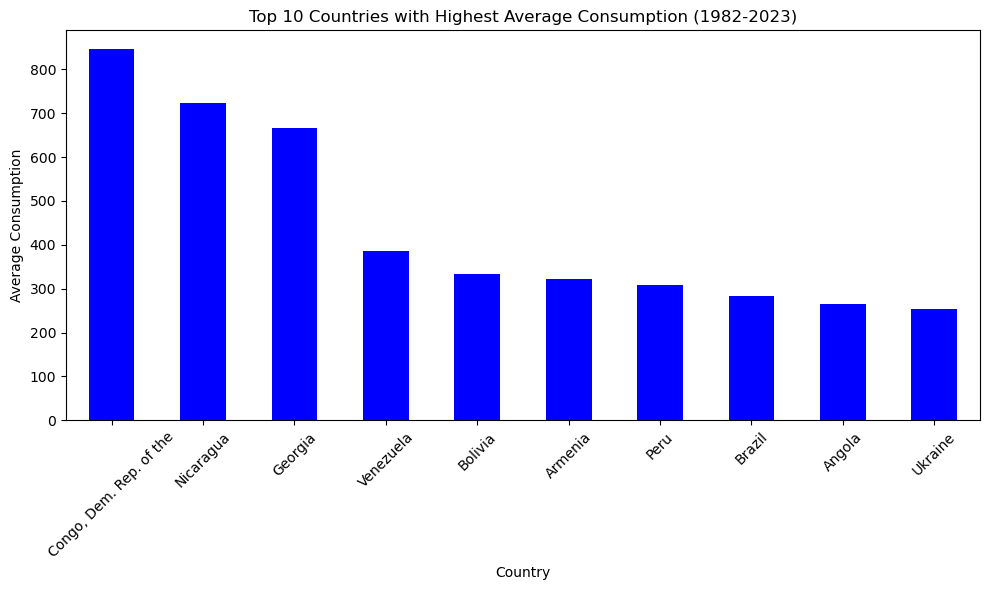

In [3]:

# Calculate the average consumption by country over the specified period
average_consumption = df.set_index('Country').mean(axis=1).sort_values(ascending=False)


# Select the top 10 and bottom 10 countries
top_10_consumption = average_consumption.head(10)
bottom_10_consumption = average_consumption.tail(10)

# Plot the top 10 countries with the highest consumption
plt.figure(figsize=(10, 6))
top_10_consumption.plot(kind='bar', color='blue')
plt.title('Top 10 Countries with Highest Average Consumption (1982-2023)')
plt.xlabel('Country')
plt.ylabel('Average Consumption')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


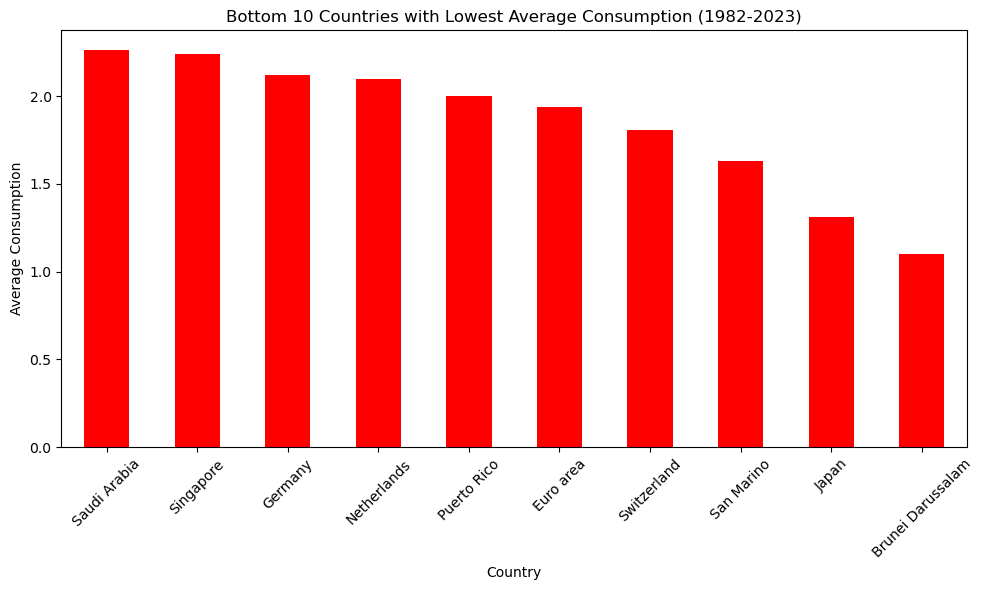

In [4]:
# Plot the bottom 10 countries with the lowest consumption
plt.figure(figsize=(10, 6))
bottom_10_consumption.plot(kind='bar', color='red')
plt.title('Bottom 10 Countries with Lowest Average Consumption (1982-2023)')
plt.xlabel('Country')
plt.ylabel('Average Consumption')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

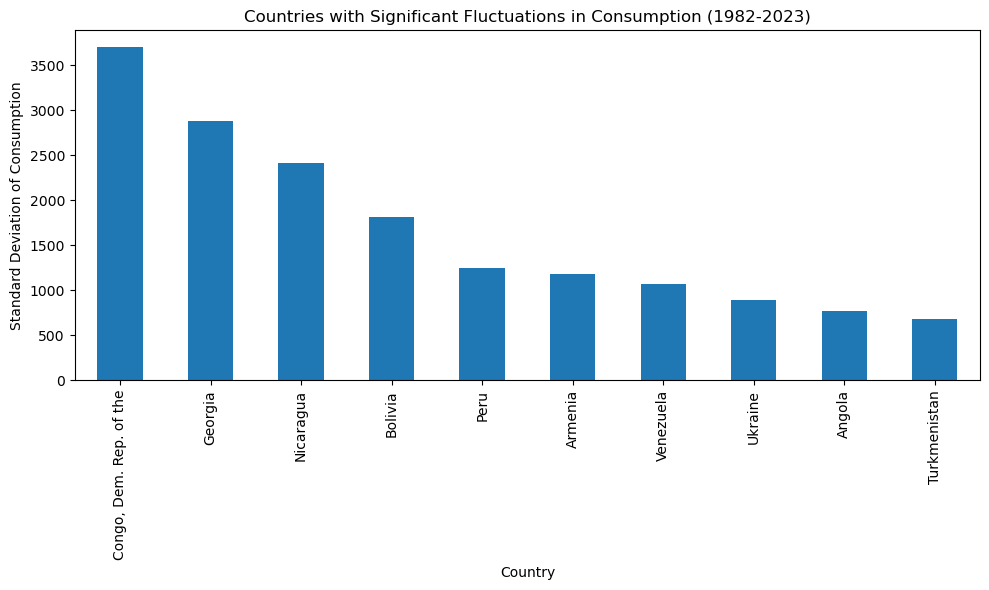

In [5]:

# Identify countries with significant fluctuations in consumption
consumption_fluctuations = df.set_index('Country').std(axis=1).sort_values(ascending=False)

# Plot the countries with significant fluctuations in consumption
plt.figure(figsize=(10, 6))
significant_fluctuations = consumption_fluctuations.head(10)
significant_fluctuations.plot(kind='bar')
plt.title('Countries with Significant Fluctuations in Consumption (1982-2023)')
plt.xlabel('Country')
plt.ylabel('Standard Deviation of Consumption')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


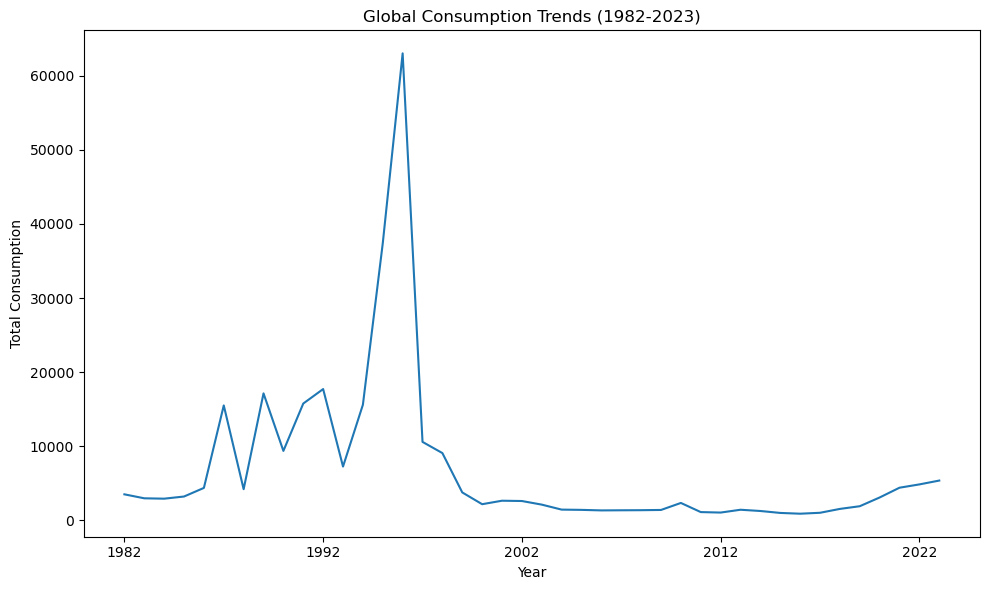

In [6]:

# Plot the global consumption trends
global_consumption = df.set_index('Country').sum(axis=0)

plt.figure(figsize=(10, 6))
global_consumption.plot()
plt.title('Global Consumption Trends (1982-2023)')
plt.xlabel('Year')
plt.ylabel('Total Consumption')
plt.tight_layout()
plt.show()


In [7]:

# Display the calculated data
average_consumption.head(), significant_fluctuations.head(), global_consumption.head()


(Country
 Congo, Dem. Rep. of the    846.666667
 Nicaragua                  724.190476
 Georgia                         665.3
 Venezuela                  385.738095
 Bolivia                    334.380952
 dtype: object,
 Country
 Congo, Dem. Rep. of the    3702.223035
 Georgia                     2882.05705
 Nicaragua                  2409.378497
 Bolivia                    1815.781226
 Peru                        1251.61997
 dtype: object,
 0
 1982    3514.0
 1983    2978.0
 1984    2928.0
 1985    3218.0
 1986    4381.0
 dtype: object)

## Forecasting

In [8]:
# Select only numeric columns and sum data for each year
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
consumption_data = df[numeric_columns].sum()

In [9]:
# Create a DataFrame for the summed data
consumption_data = pd.DataFrame(consumption_data, columns=['Total Consumption'])
consumption_data.index.name = 'Year'
consumption_data.reset_index(inplace=True)


In [10]:
# Filter out non-numeric years
consumption_data['Year'] = consumption_data['Year'].apply(pd.to_numeric, errors='coerce')
consumption_data = consumption_data.dropna()

# Verify data for model training
if consumption_data.empty:
    raise ValueError("The dataset for training the model is empty. Please check the input data.")


ValueError: The dataset for training the model is empty. Please check the input data.